# HW 7 embedding

In [1]:
import pandas as pd
from pymorphy2 import MorphAnalyzer
import re
import nltk
from nltk.corpus import stopwords

from collections import Counter

import matplotlib.pyplot as plt

In [2]:
data =pd.read_excel('отзывы за лето.xls')
data

,Rating,Content,Date
0,5,It just works!,2017-08-14
1,4,В целом удобноное приложение...из минусов хотя...,2017-08-14
2,5,Отлично все,2017-08-14
3,5,Стал зависать на 1% работы антивируса. Дальше ...,2017-08-14
4,5,"Очень удобно, работает быстро.",2017-08-14
...,...,...,...
20654,1,"Ну и шляпа,с роот правами бесполезная прога,ра...",2017-06-01
20655,5,Ок,2017-06-01
20656,4,Доволен,2017-06-01
20657,1,"Песопаснасть, рут ни нужын",2017-06-01


In [3]:
mystopwords = stopwords.words("russian")
morpher = MorphAnalyzer()


def words_only(text):
    text =str(text)
    return text.lower()   

def remove_punkt(text, ptrn):
    return re.sub(ptrn, ' ', text)

def to_token(text):
    return nltk.tokenize.word_tokenize(text)

def remove_stopwords(text, stop_words = mystopwords):
    return [w for w in text if w not in stop_words]

def join_to_str(text_list):
    return ' '.join(word for word in text_list)

def morphe_text(txt):
    txt = [morpher.parse(word)[0].normal_form for word in txt.split() if word not in mystopwords]
    return " ".join(txt)




data['Content_1'] = data['Content'].apply(words_only)
data['Content_1'] = data['Content_1'].apply(remove_punkt, ptrn=r'[^a-zA-Zа-яА-Я0-9]')
data['Content_1'] = data['Content_1'].apply(to_token)
data['Content_1'] = data['Content_1'].apply(remove_stopwords)
data['Content_1'] = data['Content_1'].apply(join_to_str)
data['Content_1'] = data['Content_1'].apply(morphe_text)

data

,Rating,Content,Date,Content_1
0,5,It just works!,2017-08-14,it just works
1,4,В целом удобноное приложение...из минусов хотя...,2017-08-14,целое удобноной приложение минус хотеть слишко...
2,5,Отлично все,2017-08-14,отлично
3,5,Стал зависать на 1% работы антивируса. Дальше ...,2017-08-14,стать зависать 1 работа антивирус далёкий нику...
4,5,"Очень удобно, работает быстро.",2017-08-14,очень удобно работать быстро
...,...,...,...,...
20654,1,"Ну и шляпа,с роот правами бесполезная прога,ра...",2017-06-01,шляпа роот право бесполезный прога разраб охре...
20655,5,Ок,2017-06-01,около
20656,4,Доволен,2017-06-01,довольный
20657,1,"Песопаснасть, рут ни нужын",2017-06-01,песопаснастя рута нужын


In [4]:
words_counter = Counter((word for text in data.Content_1 for word in text.split()))

word2idx = {
    '': 0,
    '<unk>': 1
}
for word, count in words_counter.most_common():
    if count < 3:
        break
        
    word2idx[word] = len(word2idx)
    
print('Words count', len(word2idx))

{k: v for k, v in sorted(words_counter.items(), key=lambda item: item[1], reverse=True)}

Words count 2900


{'приложение': 6762,
 'очень': 3866,
 'удобно': 3602,
 'работать': 2034,
 'удобный': 1786,
 'вс': 1690,
 'спасибо': 1430,
 'отлично': 1380,
 'нравиться': 1148,
 'телефон': 1051,
 'хороший': 1042,
 'отличный': 1021,
 'это': 917,
 'супер': 890,
 'обновление': 818,
 'быстро': 802,
 'просто': 733,
 'мочь': 733,
 'пользоваться': 715,
 'пароль': 715,
 'банк': 712,
 'антивирус': 704,
 'сбербанк': 636,
 'раз': 595,
 'устраивать': 592,
 'вход': 590,
 'пока': 583,
 'карта': 575,
 'прошивка': 549,
 'проблема': 501,
 'рута': 487,
 'писать': 474,
 'свой': 430,
 'программа': 427,
 'перевод': 425,
 'разработчик': 420,
 'сделать': 420,
 'время': 402,
 'деньга': 402,
 'ошибка': 401,
 'приходиться': 388,
 'код': 384,
 'вводить': 377,
 'норма': 374,
 'нормально': 368,
 'так': 366,
 'стать': 362,
 'почему': 359,
 'постоянно': 351,
 'счёт': 345,
 'долго': 344,
 'платёж': 342,
 'около': 341,
 'довольный': 340,
 'смс': 339,
 'право': 337,
 'исправить': 334,
 'ваш': 324,
 'который': 320,
 'понятно': 318,
 'фу

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.Content_1, data.Rating, test_size=0.33, random_state=42)

In [6]:
def convert(texts, word2idx, max_text_len):
    data = np.zeros((len(texts), max_text_len), dtype=np.int)
    
    for inx, text in enumerate(texts):
        result = []
        for word in text.split():
            if word in word2idx:
                result.append(word2idx[word])
        padding = [0]*(max_text_len - len(result))
        data[inx] = np.array(padding + result[-max_text_len:], dtype=np.int)
    return data

max_len = 150
X_train = convert(X_train, word2idx, max_len)
X_test = convert(X_test, word2idx, max_len)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_enc_labels = le.fit_transform(y_train) 
test_enc_labels = le.transform(y_test)
le.classes_

array([1, 2, 3, 4, 5], dtype=int64)

In [8]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [9]:
import tensorflow as tf
tf.__version__

import os


#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


# Возьмем за бейзлан NN на основе LSTM

In [10]:
import tensorflow.keras.layers as L
from tensorflow.keras import Model, Sequential


dim = int(len(word2idx)**(1/2))
num_classes = len(data.Rating.unique())
inputs = L.Input(shape=(X_train.shape[1],))

x = L.Embedding(input_dim=len(word2idx), output_dim=dim)(inputs)
dropout_embeds = L.SpatialDropout1D(0.05)(x)
x = L.Bidirectional(L.LSTM(units=7, return_sequences=True))(dropout_embeds)
#x = L.TimeDistributed(L.Dense(64, activation='elu'))(x)
pooled_avg_sequences = L.GlobalAveragePooling1D()(x)
pooled_max_sequences = L.GlobalMaxPooling1D()(x)
concated = L.concatenate([pooled_avg_sequences, pooled_max_sequences])
dense_intermediate = L.Dense(64, activation='elu')(concated)
x = L.Dense(num_classes, activation='softmax')(dense_intermediate)

model = Model(inputs=inputs, outputs=x)
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 150, 53)      153700      input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 150, 53)      0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 150, 14)      3416        spatial_dropout1d[0][0]          
______________________________________________________________________________________________

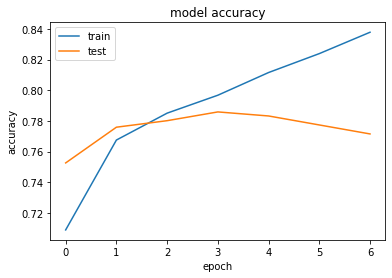

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(X_train, train_enc_labels, batch_size=128, epochs=25, 
          validation_data=(X_test, test_enc_labels), callbacks=[callback], verbose=0)
plot_history(history)

In [12]:
model.evaluate(X_test, test_enc_labels)

214/214 [==============================] - 1s 6ms/step - loss: 0.6311 - accuracy: 0.7859


[0.6310979127883911, 0.7858609557151794]

# CNN

In [13]:
inputs = L.Input(shape=(X_train.shape[1],))
embedded_sequences = L.Embedding(input_dim=len(word2idx), output_dim=dim)(inputs)
l_cov1= L.Conv1D(128, 3, activation='relu')(embedded_sequences)
l_pool1 = L.MaxPooling1D(2)(l_cov1)
l_cov2 = L.Conv1D(128, 3, activation='relu')(l_pool1)
l_pool2 = L.MaxPooling1D(2)(l_cov2)
l_cov3 = L.Conv1D(128, 3, activation='relu')(l_pool2)
l_pool3 = L.MaxPooling1D(5)(l_cov3)  # global max pooling
l_flat = L.Flatten()(l_pool3)
l_dense = L.Dense(128, activation='relu')(l_flat)
preds = L.Dense(64, activation='softmax')(l_dense)
preds = L.Dense(num_classes, activation='softmax')(l_dense)

model = Model(inputs=inputs, outputs=preds)
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 53)           153700    
_________________________________________________________________
conv1d (Conv1D)              (None, 148, 128)          20480     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 72, 128)           49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 36, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 34, 128)           4928

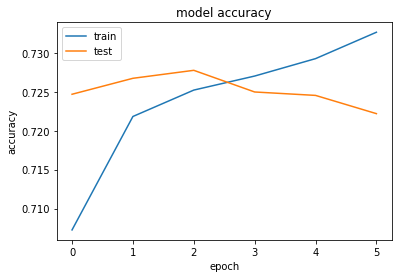

In [14]:
history = model.fit(X_train, train_enc_labels, batch_size=128, epochs=25, 
          validation_data=(X_test, test_enc_labels), callbacks=[callback], verbose=0)
plot_history(history)

In [15]:
model.evaluate(X_test, test_enc_labels)

214/214 [==============================] - 1s 3ms/step - loss: 0.9241 - accuracy: 0.7278


[0.924095094203949, 0.7277793884277344]

# Ещё  одна CNN

In [16]:
model = Sequential()
model.add(L.Embedding(input_dim=len(word2idx), output_dim=dim, input_length=max_len))
model.add(L.Conv1D(128, 3))
model.add(L.Activation("relu"))
model.add(L.GlobalMaxPool1D())
model.add(L.Dense(32))
model.add(L.Activation("relu"))
model.add(L.Dense(num_classes))
model.add(L.Activation('softmax'))

In [17]:
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 53)           153700    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 148, 128)          20480     
_________________________________________________________________
activation (Activation)      (None, 148, 128)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1

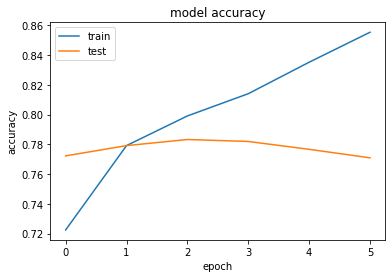

In [18]:
history = model.fit(X_train, train_enc_labels, batch_size=128, epochs=25, 
          validation_data=(X_test, test_enc_labels), callbacks=[callback], verbose=0)
plot_history(history)

In [19]:
model.evaluate(X_test, test_enc_labels)

214/214 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.7832


[0.6175603270530701, 0.7832208871841431]

# И ещё  одна CNN

In [20]:
def make_model(X_train):
    inputs = L.Input(shape=(X_train.shape[1],))

    Embedding_layer = L.Embedding(input_dim=len(word2idx), output_dim=dim)(inputs)
    conv1 = L.Conv1D(filters=64, kernel_size=3, padding="same")(Embedding_layer)
    conv1 = L.BatchNormalization()(conv1)
    conv1 = L.ReLU()(conv1)

    conv2 = L.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = L.BatchNormalization()(conv2)
    conv2 = L.ReLU()(conv2)

    conv3 = L.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = L.BatchNormalization()(conv3)
    conv3 = L.ReLU()(conv3)

    gap = L.GlobalAveragePooling1D()(conv3)

    output_layer = L.Dense(num_classes, activation="softmax")(gap)

    model = Model(inputs=inputs, outputs=output_layer)
    model.summary()
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer='adam',
                  metrics=['accuracy'])
    return model 


model = make_model(X_train)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 53)           153700    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 150, 64)           10240     
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 64)           256       
_________________________________________________________________
re_lu (ReLU)                 (None, 150, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 150, 64)           12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 64)           256 

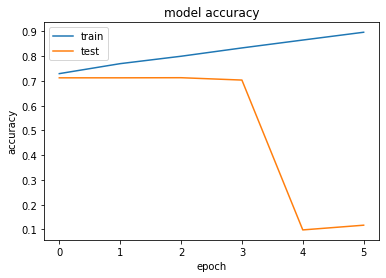

In [21]:
history = model.fit(X_train, train_enc_labels, batch_size=128, epochs=25, 
          validation_data=(X_test, test_enc_labels), callbacks=[callback], verbose=0)
plot_history(history)

In [22]:
model.evaluate(X_test, test_enc_labels)

214/214 [==============================] - 1s 3ms/step - loss: 1.0069 - accuracy: 0.7130


[1.0069490671157837, 0.7129656672477722]

# CNN + LSTM

In [23]:
model = Sequential()
model.add(L.Embedding(input_dim=len(word2idx), output_dim=dim, input_length=max_len))
model.add(L.Conv1D(128, 3))
model.add(L.Bidirectional(L.LSTM(units=32, return_sequences=True)))
model.add(L.Activation("relu"))
model.add(L.GlobalMaxPool1D())
model.add(L.Dense(32))
model.add(L.Activation("relu"))
model.add(L.Dense(num_classes))
model.add(L.Activation('softmax'))

In [24]:
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 150, 53)           153700    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 148, 128)          20480     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 148, 64)           41216     
_________________________________________________________________
activation_3 (Activation)    (None, 148, 64)           0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_4 (Activation)    (None, 32)               

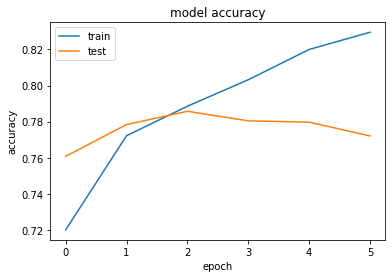

In [25]:
history = model.fit(X_train, train_enc_labels, batch_size=128, epochs=25, 
          validation_data=(X_test, test_enc_labels), callbacks=[callback], verbose=0)
plot_history(history)

In [26]:
model.evaluate(X_test, test_enc_labels)

214/214 [==============================] - 1s 6ms/step - loss: 0.6271 - accuracy: 0.7857


[0.6270883083343506, 0.7857142686843872]

# CNN 

In [33]:
def residual_block(x, filters, conv_num=3, activation="relu"):
    # Shortcut
    s = L.Conv1D(filters, 1, padding="same")(x)
    for i in range(conv_num - 1):
        x = L.Conv1D(filters, 3, padding="same")(x)
        x = L.Activation(activation)(x)
    x = L.Conv1D(filters, 3, padding="same")(x)
    x = L.Add()([x, s])
    x = L.Activation(activation)(x)
    return L.MaxPool1D(pool_size=2, strides=2)(x)



def build_model(X_train, num_classes):
    inputs = L.Input(shape=(X_train.shape[1],))
    
    x = tf.keras.layers.Reshape((X_train.shape[1], 1))(inputs)
    
    x = residual_block(x, 16, 2)
    x = residual_block(x, 32, 2)
    x = residual_block(x, 64, 3)
    x = residual_block(x, 128, 3)
    x = residual_block(x, 128, 3)

    x = L.AveragePooling1D(pool_size=3, strides=3)(x)
    x = L.Flatten()(x)
    x = L.Dense(256, activation="relu")(x)
    x = L.Dense(128, activation="relu")(x)

    outputs = L.Dense(num_classes, activation="softmax", name="output")(x)

    
    model = Model(inputs=inputs, outputs=outputs)
    model.summary()
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer='adam',
                  metrics=['accuracy'])
    return model 


In [34]:
model = build_model(X_train, num_classes)

(None, 150, 1)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 150, 1)       0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 150, 16)      64          reshape_2[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 150, 16)      0           conv1d_29[0][0]                  
_____________________________________________________________________________

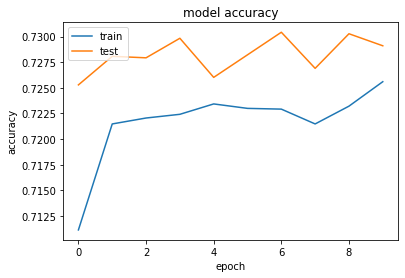

In [35]:
history = model.fit(X_train, train_enc_labels, batch_size=128, epochs=25, 
          validation_data=(X_test, test_enc_labels), callbacks=[callback], verbose=0)
plot_history(history)

In [36]:
model.evaluate(X_test, test_enc_labels)

214/214 [==============================] - 1s 6ms/step - loss: 0.8025 - accuracy: 0.7304


[0.8025290369987488, 0.7304194569587708]

# Transformer 

In [37]:
from tensorflow.keras import layers
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = L.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [38]:
embed_dim = dim  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 100  # Hidden layer size in feed forward network inside transformer

inputs = L.Input(shape=(X_train.shape[1],))
Embedding_layer = L.Embedding(input_dim=len(word2idx), output_dim=dim)(inputs)

transformer_block = TransformerBlock(dim, num_heads, ff_dim)
x = transformer_block(Embedding_layer)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)


model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 150, 53)           153700    
_________________________________________________________________
transformer_block (Transform (None, 150, 53)           33808     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 53)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 53)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0   

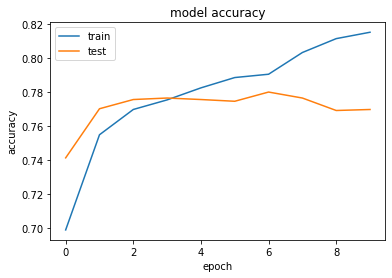

In [39]:
history = model.fit(X_train, train_enc_labels, batch_size=128, epochs=25, 
          validation_data=(X_test, test_enc_labels), callbacks=[callback], verbose=0)
plot_history(history)

In [40]:
model.evaluate(X_test, test_enc_labels)

214/214 [==============================] - 1s 4ms/step - loss: 0.6618 - accuracy: 0.7800


[0.6617721915245056, 0.7799941301345825]

# Выводы.

### Лучше всего себя показали не глубокие (простенькие) CNN и LSTM сети. Трансформер немного уступил.